# Results for TENCON 2024 paper
## Experiment 3: Effect of Target Density

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Box Plots with Error Bars for Effect of Target Density

                                    count       mean       std        min  \
Algorithm              Target Size                                          
Brownian Motion        1            189.0  22.795451  2.253525  17.884259   
                       10           210.0   2.448001  0.265378   1.954416   
                       20           200.0   1.278017  0.161366   0.977273   
Correlated Random Walk 1            180.0  12.866720  2.428251  11.179275   
                       10           180.0   1.825933  0.462537   1.121291   
                       20           199.0   1.136403  0.102873   1.001836   
Levy Flight            1            128.0  17.580983  2.181653  15.728082   
                       10           110.0   2.166684  0.370920   1.626760   
                       20           110.0   1.233793  0.143607   0.907328   
Random Walk            1            100.0  16.630799  1.047127  15.600109   
                       10           100.0   2.024188  0.236257   1.590909   

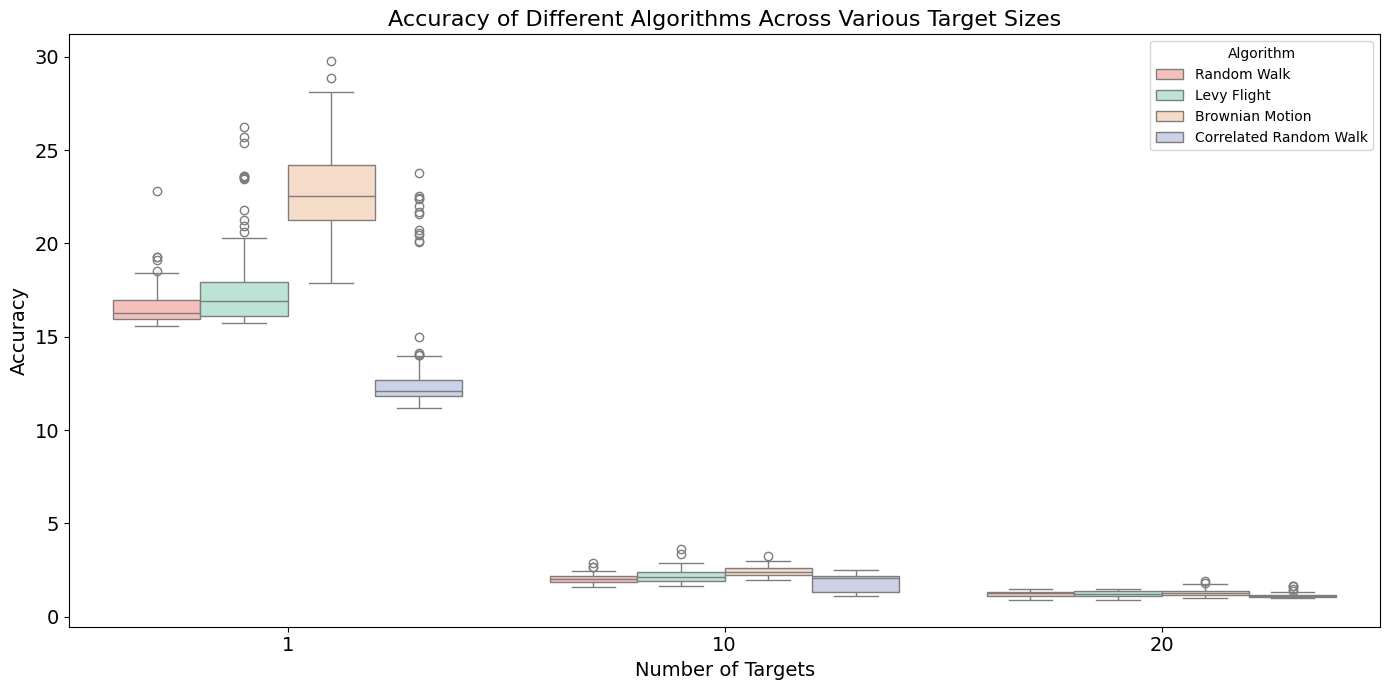

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist. Skipping.")
        return accuracies

    # Find all subdirectories in the base directory
    sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for sub_dir in sub_dirs:
        # Find all files that match the pattern e-puck*.csv in each subdirectory
        csv_files = glob.glob(os.path.join(sub_dir, 'e-puck*.csv'))
        
        # Debug print to check if files are being found
        # print(f"Found {len(csv_files)} files in {sub_dir}")

        for run_path in csv_files:
            if os.path.isfile(run_path):
                try:
                    if skip_lines:
                        df = pd.read_csv(run_path, skip_blank_lines=True)
                    else:
                        df = pd.read_csv(run_path)

                    final_average_count = df['average_count'].iloc[-1]
                    accuracy = final_average_count / actual_black_tiles
                    accuracies.append({
                        "directory": sub_dir,
                        "file": run_path,
                        "accuracy": accuracy
                    })
                except Exception as e:
                    print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Directories for each algorithm and target size
algorithms = ["Random Walk", "Levy Flight", "Brownian Motion", "Correlated Random Walk"]
target_sizes = [1, 10, 20]
base_dirs = {
    "Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets"
    },
    "Levy Flight": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets"
    },
    "Brownian Motion": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets"
    },
    "Correlated Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
    }
}

# Actual number of black tiles
actual_black_tiles = {1: 1, 10: 10, 20: 20}

# Collect accuracy data
data = []

for algorithm in algorithms:
    for target_size in target_sizes:
        if target_size in base_dirs[algorithm]:
            dir_path = base_dirs[algorithm][target_size]
            accuracy_data = read_accuracy_data(dir_path, actual_black_tiles[target_size], skip_lines=(algorithm in ["Random Walk", "Levy Flight"]))
            for entry in accuracy_data:
                data.append({
                    "Algorithm": algorithm,
                    "Target Size": target_size,
                    "Accuracy": entry['accuracy'],
                    "Directory": entry['directory'],
                    "File": entry['file']
                })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print descriptive statistics
descriptive_stats = df.groupby(['Algorithm', 'Target Size'])['Accuracy'].describe()
print(descriptive_stats)

# Identify and print outliers
outliers = df[df['Accuracy'] > 15]
print("\nOutliers with Accuracy > 15:")

# Set pandas options to display the full content
pd.set_option('display.max_colwidth', None)

print(outliers)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the accuracies using box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Target Size', y='Accuracy', hue='Algorithm', data=df, palette=pastel_palette)

# Adding labels and title
plt.title('Accuracy of Different Algorithms Across Various Target Sizes', fontsize=16)
plt.xlabel('Number of Targets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Algorithm', fontsize=10, loc='upper right')
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# Save the figure
plt.savefig('/home/herzon/results-thesis/subthesis-3/final_plots/3_results.png', format='png', dpi=1200)

plt.show()


# Absolute Error

                                    count       mean       std        min  \
Algorithm              Target Size                                          
Brownian Motion        1            189.0  21.795451  2.253525  16.884259   
                       10           210.0  14.480009  2.653775   9.544160   
                       20           200.0   5.566272  3.217015   0.055556   
Correlated Random Walk 1            180.0  11.866720  2.428251  10.179275   
                       10           180.0   8.259328  4.625367   1.212912   
                       20           199.0   2.728061  2.057451   0.036725   
Levy Flight            1            128.0  16.580983  2.181653  14.728082   
                       10           110.0  11.666839  3.709196   6.267599   
                       20           110.0   4.715222  2.806454   0.311527   
Random Walk            1            100.0  15.630799  1.047127  14.600109   
                       10           100.0  10.241879  2.362568   5.909091   

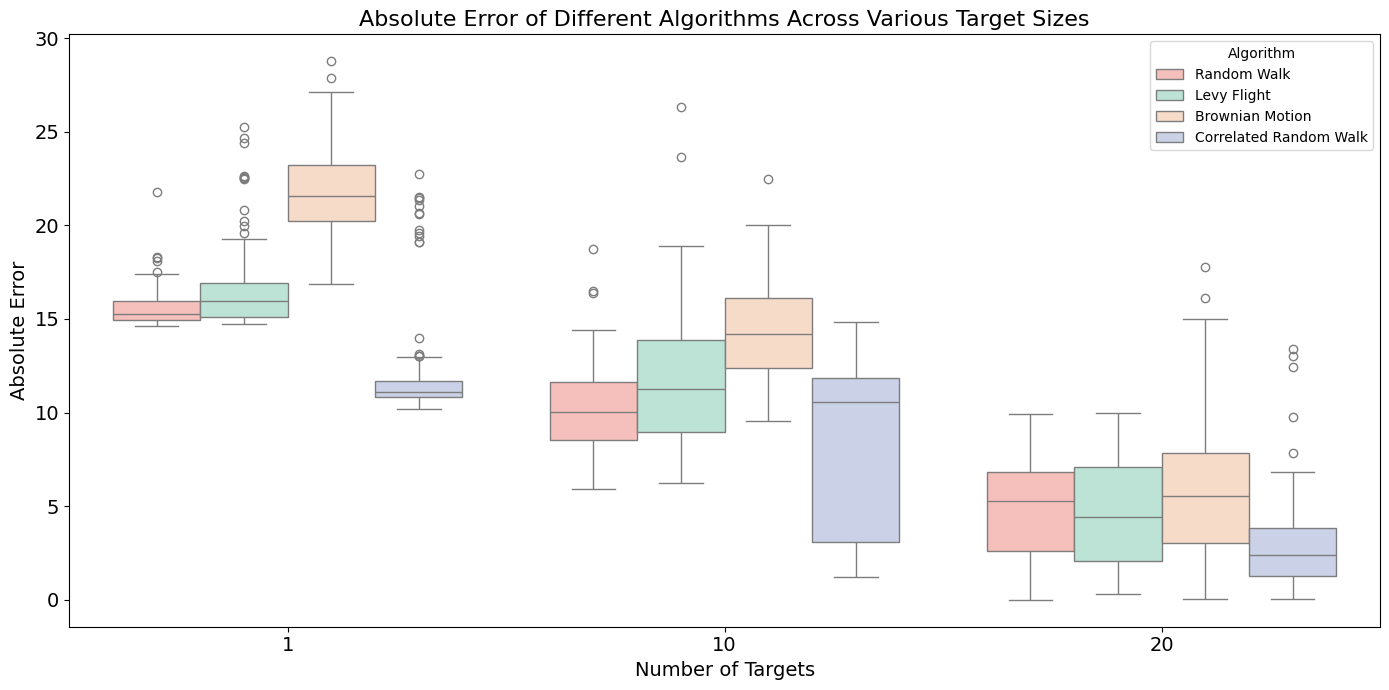

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Function to read error data from a given directory
def read_error_data(base_dir, actual_black_tiles, skip_lines=False):
    errors = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist. Skipping.")
        return errors

    # Find all subdirectories in the base directory
    sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for sub_dir in sub_dirs:
        # Find all files that match the pattern e-puck*.csv in each subdirectory
        csv_files = glob.glob(os.path.join(sub_dir, 'e-puck*.csv'))
        
        for run_path in csv_files:
            if os.path.isfile(run_path):
                try:
                    if skip_lines:
                        df = pd.read_csv(run_path, skip_blank_lines=True)
                    else:
                        df = pd.read_csv(run_path)

                    final_average_count = df['average_count'].iloc[-1]
                    error = abs(final_average_count - actual_black_tiles)
                    errors.append({
                        "directory": sub_dir,
                        "file": run_path,
                        "error": error
                    })
                except Exception as e:
                    print(f"Error reading {run_path}: {e}")
    
    return errors

# Directories for each algorithm and target size
algorithms = ["Random Walk", "Levy Flight", "Brownian Motion", "Correlated Random Walk"]
target_sizes = [1, 10, 20]
base_dirs = {
    "Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets"
    },
    "Levy Flight": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets"
    },
    "Brownian Motion": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets"
    },
    "Correlated Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_1target",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_10targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
    }
}

# Actual number of black tiles
actual_black_tiles = {1: 1, 10: 10, 20: 20}

# Collect error data
data = []

for algorithm in algorithms:
    for target_size in target_sizes:
        if target_size in base_dirs[algorithm]:
            dir_path = base_dirs[algorithm][target_size]
            error_data = read_error_data(dir_path, actual_black_tiles[target_size], skip_lines=(algorithm in ["Random Walk", "Levy Flight"]))
            for entry in error_data:
                data.append({
                    "Algorithm": algorithm,
                    "Target Size": target_size,
                    "Error": entry['error'],
                    "Directory": entry['directory'],
                    "File": entry['file']
                })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print descriptive statistics
descriptive_stats = df.groupby(['Algorithm', 'Target Size'])['Error'].describe()
print(descriptive_stats)

# Identify and print outliers
outliers = df[df['Error'] > 30]
print("\nOutliers with Error > 30:")

# Set pandas options to display the full content
pd.set_option('display.max_colwidth', None)

print(outliers)

# Save descriptive statistics to CSV
descriptive_stats.to_csv('/home/herzon/results-thesis/subthesis-3/final_descriptive_stats/3_stats.csv')

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the errors using box plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Target Size', y='Error', hue='Algorithm', data=df, palette=pastel_palette)

# Adding labels and title
plt.title('Absolute Error of Different Algorithms Across Various Target Sizes', fontsize=16)
plt.xlabel('Number of Targets', fontsize=14)
plt.ylabel('Absolute Error', fontsize=14)
plt.legend(title='Algorithm', fontsize=10, loc='upper right')
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# Save the figure
plt.savefig('/home/herzon/results-thesis/subthesis-3/final_plots/3_results_error.png', format='png', dpi=1200)

plt.show()
